# Neural Nets and Deep Learning with Tensorflow

# Tensorflow

In [4]:
#Tensorflow Basics

In [5]:
##ignore all warnings!! Use warnings.filterwarnings(action='once') instead to see the warnings once
import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf

In [8]:
hello = tf.constant('Hello World')

In [12]:
type(hello)#Just checking the object that we created - a Tensor object

tensorflow.python.framework.ops.Tensor

In [15]:
##Creating a Tensorflow session which is a class for running Tensorflow operations
sess = tf.Session()

In [17]:
sess.run(hello) #b stands for unicode indication

b'Hello World'

In [18]:
#Tensorflow Operations

In [19]:
x = tf.constant(2)
y = tf.constant(3)

In [28]:
with tf.Session() as sess: #similar to opening a file with python
    print('Operation with constants', sess.run(x),'and',sess.run(y))
    print('Addition:',sess.run(x+y))
    print('Division:',sess.run(x/y))

Operation with constants 2 and 3
Addition: 5
Division: 0.6666666666666666


In [29]:
#Working with placeholders

In [30]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [33]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [34]:
d = {x:120,y:300}

In [64]:
with tf.Session() as sess:
    print('Operation with placeholders')
    print('Addition:',sess.run(add,feed_dict={x:120,y:300}))
    print('Subtraction:',sess.run(sub,feed_dict=d))
    print('Multiplication:',sess.run(mul,feed_dict=d))    

Operation with placeholders
Addition: 420
Subtraction: -180
Multiplication: 36000


In [65]:
#Matrix operations
import numpy as np

In [80]:
a = np.array([[345.3,54.9]]) #1 by 2
b = np.array([[242.304],[2.405]]) #2 by 1

In [81]:
#Converting matrices to Tensorflow objects
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [82]:
matrix_multi = tf.matmul(mat1,mat2)

In [83]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[83799.6057]]


# Working with MNIST

In [105]:
from tensorflow.examples.tutorials.mnist import mnistut_data

In [106]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [107]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
mnist.train.images[1].shape 
#checking the shape of the first image in the mnist array. It is a string on 784 pixels

(784,)

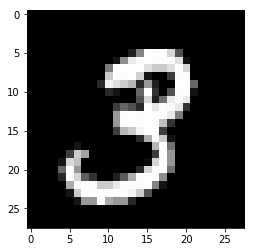

In [118]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')
#converting an image to 28*28 matrix and grayscale using cmap to see how it looks. We would however, be using the 784
#version

In [121]:
x = tf.placeholder(tf.float32,shape=[None,784]) #this is the training data that we are passing
W = tf.Variable(tf.zeros([784,10])) #these are the weight. We use 10 because there are 10 possible values for the pixels
#from 0 through 9
b = tf.Variable(tf.zeros([10]))
#The second dimension of x matches with the first of W and the second dimension of W matches with the first of b. This
# is required for matrix multiplication

In [122]:
y = tf.matmul(x,W) + b

In [123]:
y_true = tf.placeholder(tf.float32,shape=[None,10]) #we are creating this for comparing with y

In [125]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))
#This is for trying to reduce the error between y2 and our prediction which is y

In [126]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)# a lower learning rate is slower but more accurate

In [127]:
train = optimizer.minimize(cross_entropy)
#So optimizer is a way of reducing the error and cross_entropy is defining the error. So this statement basically is
#trying to minimize that error

In [128]:
#initializing a session
init = tf.global_variables_initializer()

In [130]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)#usually you would not have the next_batch method available for data sets
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))#checking where there are equal between what we predicted and the what label was provided
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))

    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9168


In [131]:
#So we are able to predict with 91.68% accuracy, the images that we get

# Tensorflow estimators

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv('iris.csv')

In [135]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [136]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [165]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width','target'] #Removing spaces from column names

In [166]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [167]:
df['target'] = df['target'].apply(int) #converting the target column to an integer field

In [168]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [169]:
y = df['target']
X = df.drop('target',axis=1)

In [170]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [171]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [174]:
#FEATURE COLUMNS for the Tensorflow estimators

In [175]:
feat_cols=[]

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [176]:
feat_cols

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [177]:
#Creating input function for training and evaluation where one has training data the other has test data

In [178]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,batch_size=10,num_epochs=5,shuffle=True)

In [179]:
classifier = tf.estimator.DNNClassifier(hidden_units = [10,20,10],n_classes=3,feature_columns=feat_cols)
#so we have 3 hidden layers of neurons and 3 classes for the 3 types of iris

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/ts/889lcw356xj4mcrxw8m0gz4h0000gn/T/tmp0d0_zb0_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c4597bb00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [181]:
classifier.train(input_fn=input_func,steps=50) #actual training

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ts/889lcw356xj4mcrxw8m0gz4h0000gn/T/tmp0d0_zb0_/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 50 into /var/folders/ts/889lcw356xj4mcrxw8m0gz4h0000gn/T/tmp0d0_zb0_/model.ckpt.
INFO:tensorflow:loss = 5.561918, step = 51
INFO:tensorflow:Saving checkpoints for 100 into /var/folders/ts/889lcw356xj4mcrxw8m0gz4h0000gn/T/tmp0d0_zb0_/model.ckpt.
INFO:tensorflow:Loss for final step: 3.4250631.


In [184]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
#Creating a prediction function with the test data to see how well the train performed

In [185]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ts/889lcw356xj4mcrxw8m0gz4h0000gn/T/tmp0d0_zb0_/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [187]:
predictions #Returns the probabilities of the item of belonging to a particular class

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logits': array([ 3.6942697, -1.487988 , -5.563284 ], dtype=float32),
  'probabilities': array([9.9432170e-01, 5.5834292e-03, 9.4846800e-05], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logits': array([-4.1012697,  0.6100554, -1.2575712], dtype=float32),
  'probabilities': array([0.00772925, 0.8594884 , 0.13278227], dtype=float32)},
 {'class_ids': array([2]),
  'classes': array([b'2'], dtype=object),
  'logits': array([-5.613288 ,  0.7082428,  1.2251734], dtype=float32),
  'probabilities': array([0.00067093, 0.3733196 , 0.62600946], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logits': array([-3.9038582 ,  0.6140403 , -0.19235095], dtype=float32),
  'probabilities': array([0.00748737, 0.68616366, 0.30634898], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logits': array([-4.806659  ,  0.

In [189]:
#Creating a list of predictions
final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [193]:
final_preds

[0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0]

In [194]:
from sklearn.metrics import confusion_matrix,classification_report

In [195]:
print(confusion_matrix(y_test,final_preds))

[[15  0  0]
 [ 0 10  5]
 [ 0  0 15]]


In [196]:
print(classification_report(y_test,final_preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      0.67      0.80        15
          2       0.75      1.00      0.86        15

avg / total       0.92      0.89      0.89        45

